In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/costa-rican-household-poverty-prediction/sample_submission.csv
/kaggle/input/costa-rican-household-poverty-prediction/codebook.csv
/kaggle/input/costa-rican-household-poverty-prediction/train.csv.zip
/kaggle/input/costa-rican-household-poverty-prediction/sample_submission.csv.zip
/kaggle/input/costa-rican-household-poverty-prediction/codebook.xlsx
/kaggle/input/costa-rican-household-poverty-prediction/train.csv
/kaggle/input/costa-rican-household-poverty-prediction/test.csv
/kaggle/input/costa-rican-household-poverty-prediction/test.csv.zip


In [2]:
# Carregando os dados
df = pd.read_csv('/kaggle/input/costa-rican-household-poverty-prediction/train.csv')
test = pd.read_csv('/kaggle/input/costa-rican-household-poverty-prediction/test.csv')

df.shape, test.shape

((9557, 143), (23856, 142))

In [3]:
# Juntando os dataframes de treino e teste
df_all = df.append(test)

df_all.shape

(33413, 143)

In [4]:
# Entender os dados
df_all.info(max_cols=145)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33413 entries, 0 to 23855
Data columns (total 143 columns):
 #    Column           Non-Null Count  Dtype  
---   ------           --------------  -----  
 0    Id               33413 non-null  object 
 1    v2a1             9150 non-null   float64
 2    hacdor           33413 non-null  int64  
 3    rooms            33413 non-null  int64  
 4    hacapo           33413 non-null  int64  
 5    v14a             33413 non-null  int64  
 6    refrig           33413 non-null  int64  
 7    v18q             33413 non-null  int64  
 8    v18q1            7945 non-null   float64
 9    r4h1             33413 non-null  int64  
 10   r4h2             33413 non-null  int64  
 11   r4h3             33413 non-null  int64  
 12   r4m1             33413 non-null  int64  
 13   r4m2             33413 non-null  int64  
 14   r4m3             33413 non-null  int64  
 15   r4t1             33413 non-null  int64  
 16   r4t2             33413 non-null  int64

## Pré-processamento e limpeza dos dados

In [5]:
# Quais colunas do dataframe são do tipo object
df_all.select_dtypes('object').head()

,Id,idhogar,dependency,edjefe,edjefa
0,ID_279628684,21eb7fcc1,no,10,no
1,ID_f29eb3ddd,0e5d7a658,8,12,no
2,ID_68de51c94,2c7317ea8,8,no,11
3,ID_d671db89c,2b58d945f,yes,11,no
4,ID_d56d6f5f5,2b58d945f,yes,11,no


In [6]:
# Olhando a coluna dependency
df_all['dependency'].value_counts()

yes          7580
no           6036
.5           5175
2            2499
1.5          2471
.33333334    2131
.66666669    1617
8            1415
.25           944
3             832
1.3333334     362
.2            306
2.5           301
.75           301
4             295
.40000001     259
.60000002     136
1.6666666     128
5             120
1.25           72
.80000001      63
.16666667      63
3.5            36
.83333331      33
.14285715      32
2.3333333      30
2.25           26
1.2            22
.2857143       18
7              16
6              14
.85714287      13
3.3333333      13
.71428573      12
.375           11
.22222222      11
1.75           11
.125            9
Name: dependency, dtype: int64

##### coluna dependency, Dependency rate, calculated = (number of members of the household younger than 19 or older than 64)/(number of member of household between 19 and 64)

### Investigando o valor 'yes' na coluna dependency

In [7]:
# Vamos obter o idhogar de alguns casos
df_all[df_all['dependency'] == 'yes']['idhogar'].head()

3    2b58d945f
4    2b58d945f
5    2b58d945f
6    2b58d945f
7    d6dae86b7
Name: idhogar, dtype: object

In [8]:
# Vamos investigar o idhogar 2b58d945f pegando as variáveis de cálculo da coluna dependency
df_all[df_all['idhogar'] == '2b58d945f'][['hogar_nin', 'hogar_adul', 'hogar_mayor', 'hogar_total']]

,hogar_nin,hogar_adul,hogar_mayor,hogar_total
3,2,2,0,4
4,2,2,0,4
5,2,2,0,4
6,2,2,0,4


In [9]:
# Vamos investigar o idhogar d6dae86b7 pegando as variáveis de cálculo da coluna dependency
df_all[df_all['idhogar'] == 'd6dae86b7'][['hogar_nin', 'hogar_adul', 'hogar_mayor', 'hogar_total']]

,hogar_nin,hogar_adul,hogar_mayor,hogar_total
7,2,2,0,4
8,2,2,0,4
9,2,2,0,4
10,2,2,0,4


### dependency Yes está dando 1
#### avaliar o no agora

In [10]:
# Vamos obter o idhogar de alguns casos
df_all[df_all['dependency'] == 'no']['idhogar'].head()

0     21eb7fcc1
19    d29058053
20    d29058053
23    3e16fab89
24    3e16fab89
Name: idhogar, dtype: object

In [11]:
# Vamos investigar o idhogar 3e16fab89 pegando as variáveis de cálculo da coluna dependency
df_all[df_all['idhogar'] == '3e16fab89'][['hogar_nin', 'hogar_adul', 'hogar_mayor', 'hogar_total']]

,hogar_nin,hogar_adul,hogar_mayor,hogar_total
23,0,3,0,3
24,0,3,0,3
25,0,3,0,3


In [12]:
# Vamos investigar o idhogar d29058053 pegando as variáveis de cálculo da coluna dependency
df_all[df_all['idhogar'] == 'd29058053'][['hogar_nin', 'hogar_adul', 'hogar_mayor', 'hogar_total']]

,hogar_nin,hogar_adul,hogar_mayor,hogar_total
19,0,2,0,2
20,0,2,0,2


### dependency 'no' está dando 0

* edjefe, years of education of male head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0
* edjefa, years of education of female head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0

In [13]:
# Analisando os dados da coluna edjefa
df_all['edjefa'].value_counts()

no     22075
6       3401
11      1350
9        735
15       656
8        627
5        623
7        561
3        533
4        399
16       393
14       384
2        347
10       324
17       311
12       227
yes      214
13       194
21        29
19        14
18         9
20         7
Name: edjefa, dtype: int64

In [14]:
# Analisando os dados da coluna edjefe
df_all['edjefe'].value_counts()

no     12818
6       6958
11      2507
9       1564
3       1046
8       1020
15       910
14       804
7        797
17       702
5        685
2        617
16       609
4        505
12       494
yes      416
10       395
13       341
21       111
19        44
18        39
20        31
Name: edjefe, dtype: int64

In [15]:
# Vamos transformar 'yes' em 1 e 'no' em 0
# nas colunas edjefa e edjefe
mapeamento = {'yes': 1, 'no': 0}

df_all['edjefa'] = df_all['edjefa'].replace(mapeamento).astype(int)
df_all['edjefe'] = df_all['edjefe'].replace(mapeamento).astype(int)

In [16]:
# Vamos transformar 'yes' em 1 e 'no' em 0
# na coluna dependency
df_all['dependency'] = df_all['dependency'].replace(mapeamento).astype(float)

In [17]:
# Quais colunas do dataframe são do tipo object
df_all.select_dtypes('object').head()

,Id,idhogar
0,ID_279628684,21eb7fcc1
1,ID_f29eb3ddd,0e5d7a658
2,ID_68de51c94,2c7317ea8
3,ID_d671db89c,2b58d945f
4,ID_d56d6f5f5,2b58d945f


In [18]:
# Visualizando do comando info
df_all.info(max_cols=145)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33413 entries, 0 to 23855
Data columns (total 143 columns):
 #    Column           Non-Null Count  Dtype  
---   ------           --------------  -----  
 0    Id               33413 non-null  object 
 1    v2a1             9150 non-null   float64
 2    hacdor           33413 non-null  int64  
 3    rooms            33413 non-null  int64  
 4    hacapo           33413 non-null  int64  
 5    v14a             33413 non-null  int64  
 6    refrig           33413 non-null  int64  
 7    v18q             33413 non-null  int64  
 8    v18q1            7945 non-null   float64
 9    r4h1             33413 non-null  int64  
 10   r4h2             33413 non-null  int64  
 11   r4h3             33413 non-null  int64  
 12   r4m1             33413 non-null  int64  
 13   r4m2             33413 non-null  int64  
 14   r4m3             33413 non-null  int64  
 15   r4t1             33413 non-null  int64  
 16   r4t2             33413 non-null  int64

In [19]:
# Verificando os valores nulos
df_all.isnull().sum()

Id                     0
v2a1               24263
hacdor                 0
rooms                  0
hacapo                 0
                   ...  
SQBovercrowding        0
SQBdependency          0
SQBmeaned             36
agesq                  0
Target             23856
Length: 143, dtype: int64

### avaliando Colunas com NA

* v2a1, Monthly rent payment
* v18q, owns a tablet
* v18q1, number of tablets household owns
* rez_esc, Years behind in school
* meaneduc,average years of education for adults (18+)
* SQBmeaned, square of the mean years of education of adults (>=18) in the household

In [20]:
# Verificando os valores de aluguel (v2a1) para os chefes/as de familia (parentesco1 = 1)
df_all[df_all['parentesco1'] == 1]['v2a1'].isnull().sum()

7556

In [21]:
# Verificando os valores de aluguel (v2a1) para 
df_all[df_all['parentesco2'] == 1]['v2a1'].isnull().sum()

4444

In [22]:
# Verificando os valores de aluguel (v2a1) para 
df_all[df_all['parentesco3'] == 1]['v2a1'].isnull().sum()

9215

In [23]:
# Verificando os valores de aluguel (v2a1) para 
df_all[df_all['parentesco12'] == 1]['v2a1'].isnull().sum()

148

In [24]:
# Qual a cara dos dados de v18q
df_all['v18q'].value_counts()

0    25468
1     7945
Name: v18q, dtype: int64

### v18q1 tem 7945 valores, ou seja, as colunas com NA é quando o valor de tablet é 0

In [25]:
# Prenchendo com 0 os valores nulos de v18q1
df_all['v18q1'].fillna(0, inplace=True)

In [26]:
# Qual a cara dos dados de escolari
df_all['escolari'].value_counts()

6     6951
0     4469
11    3899
9     2175
8     1799
7     1635
3     1452
15    1375
5     1227
14    1114
2     1087
10    1020
4     1019
12    1010
1      964
16     715
13     681
17     675
21      75
18      29
19      26
20      16
Name: escolari, dtype: int64

In [27]:
# Qual a cara dos dados de rez_esc
df_all['rez_esc'].value_counts()

0.0     4474
1.0      728
2.0      336
3.0      174
4.0       80
5.0       39
99.0       1
Name: rez_esc, dtype: int64

In [28]:

df_all['meaneduc'].value_counts()

6.0     3025
11.0    1514
7.0     1454
9.0     1450
8.5     1192
        ... 
37.0       3
36.0       3
33.0       3
23.5       3
32.0       2
Name: meaneduc, Length: 211, dtype: int64

In [29]:
df_all[df_all['meaneduc'].isnull()][['hogar_nin', 'hogar_adul', 'hogar_mayor', 'hogar_total']]

,hogar_nin,hogar_adul,hogar_mayor,hogar_total
1291,1,0,0,1
1840,2,0,0,2
1841,2,0,0,2
2049,2,0,0,2
2050,2,0,0,2
4,1,0,0,1
535,1,0,0,1
536,2,0,0,2
537,2,0,0,2
2612,2,0,0,2


In [30]:
df_all[df_all['meaneduc'].isnull()][['escolari', 'SQBmeaned']]

,escolari,SQBmeaned
1291,10,NaN
1840,6,NaN
1841,4,NaN
2049,12,NaN
2050,12,NaN
4,11,NaN
535,11,NaN
536,12,NaN
537,12,NaN
2612,8,NaN


In [31]:
df_all.loc[(df_all['meaneduc'].isnull()) & (df_all['escolari'] == 0)][['meaneduc', 'escolari']]

,meaneduc,escolari
15810,NaN,0
16096,NaN,0
21137,NaN,0
21645,NaN,0
21826,NaN,0
22125,NaN,0
22337,NaN,0


In [32]:
mask = (df_all['meaneduc'].isnull()) & (df_all['escolari'] == 0)

df_all.loc[mask, 'meaneduc'] = 0
df_all.loc[mask, 'SQBmeaned'] = 0

In [33]:
df_all[df_all['meaneduc'].isnull()][['hogar_nin', 'hogar_adul', 'hogar_mayor', 'hogar_total']]

,hogar_nin,hogar_adul,hogar_mayor,hogar_total
1291,1,0,0,1
1840,2,0,0,2
1841,2,0,0,2
2049,2,0,0,2
2050,2,0,0,2
4,1,0,0,1
535,1,0,0,1
536,2,0,0,2
537,2,0,0,2
2612,2,0,0,2


In [34]:
df_all[df_all['meaneduc'].isnull()][['escolari', 'SQBmeaned']]

,escolari,SQBmeaned
1291,10,NaN
1840,6,NaN
1841,4,NaN
2049,12,NaN
2050,12,NaN
4,11,NaN
535,11,NaN
536,12,NaN
537,12,NaN
2612,8,NaN


* as colunas que 'escolari' era zero, substitui o NA do 'meaneduc' e do 'SQBmeaned' para 0

In [35]:
df_all[['escolari', 'meaneduc', 'hogar_nin', 'hogar_adul', 'hogar_mayor', 'hogar_total', 'age', 'idhogar']]

,escolari,meaneduc,hogar_nin,hogar_adul,hogar_mayor,hogar_total,age,idhogar
0,10,10.00,0,1,0,1,43,21eb7fcc1
1,12,12.00,0,1,1,1,67,0e5d7a658
2,11,11.00,0,1,1,1,92,2c7317ea8
3,9,11.00,2,2,0,4,17,2b58d945f
4,11,11.00,2,2,0,4,37,2b58d945f
...,...,...,...,...,...,...,...,...
23851,3,5.75,2,4,0,6,10,3aa78c56b
23852,6,6.00,2,2,0,4,54,d237404b6
23853,4,6.00,2,2,0,4,12,d237404b6
23854,5,6.00,2,2,0,4,12,d237404b6


In [36]:
df_all[df_all['idhogar'] == '3aa78c56b'][['hogar_nin', 'hogar_adul', 'hogar_mayor', 'hogar_total','age', 'escolari', 'idhogar', 'meaneduc']]

,hogar_nin,hogar_adul,hogar_mayor,hogar_total,age,escolari,idhogar,meaneduc
23846,2,4,0,6,24,5,3aa78c56b,5.75
23847,2,4,0,6,57,5,3aa78c56b,5.75
23848,2,4,0,6,18,0,3aa78c56b,5.75
23849,2,4,0,6,47,5,3aa78c56b,5.75
23850,2,4,0,6,27,8,3aa78c56b,5.75
23851,2,4,0,6,10,3,3aa78c56b,5.75


'meaneduc' é a soma da escolaridade dos adultos > 19 anos / pelo numero de adultos
(5+5+5+8)/4 =5.75

In [37]:
df_all[df_all['meaneduc'].isnull()][['hogar_nin', 'hogar_adul', 'hogar_mayor', 'hogar_total','age', 'escolari', 'meaneduc',  'SQBmeaned']]

,hogar_nin,hogar_adul,hogar_mayor,hogar_total,age,escolari,meaneduc,SQBmeaned
1291,1,0,0,1,18,10,NaN,NaN
1840,2,0,0,2,18,6,NaN,NaN
1841,2,0,0,2,18,4,NaN,NaN
2049,2,0,0,2,19,12,NaN,NaN
2050,2,0,0,2,19,12,NaN,NaN
4,1,0,0,1,18,11,NaN,NaN
535,1,0,0,1,18,11,NaN,NaN
536,2,0,0,2,19,12,NaN,NaN
537,2,0,0,2,19,12,NaN,NaN
2612,2,0,0,2,19,8,NaN,NaN


* como 'hogar_adul' é 0 em todos os casos que o 'meaneduc' é NA, 'meaneduc' é 0 nessas linhas e consequentemente 'SQBmeaned' é 0 nessas linhas
* o dicionário de dados está errado ao falar que 'SQBmeaned' é de adultos >= 18, na verdade adulto pra base é > 18

In [38]:
df_all['SQBmeaned'].fillna(0, inplace=True)
df_all['meaneduc'].fillna(0, inplace=True)

In [39]:
df_all.info(max_cols=145)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33413 entries, 0 to 23855
Data columns (total 143 columns):
 #    Column           Non-Null Count  Dtype  
---   ------           --------------  -----  
 0    Id               33413 non-null  object 
 1    v2a1             9150 non-null   float64
 2    hacdor           33413 non-null  int64  
 3    rooms            33413 non-null  int64  
 4    hacapo           33413 non-null  int64  
 5    v14a             33413 non-null  int64  
 6    refrig           33413 non-null  int64  
 7    v18q             33413 non-null  int64  
 8    v18q1            33413 non-null  float64
 9    r4h1             33413 non-null  int64  
 10   r4h2             33413 non-null  int64  
 11   r4h3             33413 non-null  int64  
 12   r4m1             33413 non-null  int64  
 13   r4m2             33413 non-null  int64  
 14   r4m3             33413 non-null  int64  
 15   r4t1             33413 non-null  int64  
 16   r4t2             33413 non-null  int64

In [40]:
# vendo a dis†ribuição de lugares em que o valor do aluguel 'v2a1' é NA

df_all[df_all['v2a1'].isnull()][['lugar1', 'lugar2', 'lugar3', 'lugar4', 'lugar5', 'lugar6']].value_counts()

lugar1  lugar2  lugar3  lugar4  lugar5  lugar6
1       0       0       0       0       0         13242
0       0       0       0       1       0          2693
                        1       0       0          2289
        1       0       0       0       0          2263
        0       0       0       0       1          2005
                1       0       0       0          1771
dtype: int64

In [41]:
# vendo a dis†ribuição de lugares em que o valor do aluguel 'v2a1' não é NA

df_all[df_all['v2a1'].notnull()][['lugar1', 'lugar2', 'lugar3', 'lugar4', 'lugar5', 'lugar6']].value_counts()

lugar1  lugar2  lugar3  lugar4  lugar5  lugar6
1       0       0       0       0       0         6226
0       0       0       0       0       1          611
        1       0       0       0       0          597
        0       0       0       1       0          581
                1       0       0       0          569
                0       1       0       0          566
dtype: int64

In [42]:
# vendo a dis†ribuição de lugares em que o valor do aluguel 'v2a1' não é NA
df_s =df_all[df_all['v2a1'].notnull()]

df_s.groupby(['lugar1', 'lugar2', 'lugar3', 'lugar4', 'lugar5', 'lugar6'])[['v2a1']].median()

v2a1
lugar1 lugar2 lugar3 lugar4 lugar5 lugar6          
0      0      0      0      0      1        70000.0
                            1      0        65000.0
                     1      0      0        80000.0
              1      0      0      0       100000.0
       1      0      0      0      0       100000.0
1      0      0      0      0      0       155000.0

In [43]:
mask_lugar1 = (df_all['v2a1'].isnull()) & (df_all['lugar1'] == 1)
mask_lugar2 = (df_all['v2a1'].isnull()) & (df_all['lugar2'] == 1)
mask_lugar3 = (df_all['v2a1'].isnull()) & (df_all['lugar3'] == 1)
mask_lugar4 = (df_all['v2a1'].isnull()) & (df_all['lugar4'] == 1)
mask_lugar5 = (df_all['v2a1'].isnull()) & (df_all['lugar5'] == 1)
mask_lugar6 = (df_all['v2a1'].isnull()) & (df_all['lugar6'] == 1)

df_all.loc[mask_lugar1, 'v2a1'] = 155000.0
df_all.loc[mask_lugar2, 'v2a1'] = 100000.0
df_all.loc[mask_lugar3, 'v2a1'] = 100000.0
df_all.loc[mask_lugar4, 'v2a1'] = 80000.0
df_all.loc[mask_lugar5, 'v2a1'] = 65000.0
df_all.loc[mask_lugar6, 'v2a1'] = 70000.0

* vou imputar com -1 os NAs de 'rez_esc' por nao conseguir calcular a partir dos dados q tenho

In [44]:
df_all['rez_esc'].fillna(-1, inplace=True)

In [45]:
df_all.info(max_cols=145)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33413 entries, 0 to 23855
Data columns (total 143 columns):
 #    Column           Non-Null Count  Dtype  
---   ------           --------------  -----  
 0    Id               33413 non-null  object 
 1    v2a1             33413 non-null  float64
 2    hacdor           33413 non-null  int64  
 3    rooms            33413 non-null  int64  
 4    hacapo           33413 non-null  int64  
 5    v14a             33413 non-null  int64  
 6    refrig           33413 non-null  int64  
 7    v18q             33413 non-null  int64  
 8    v18q1            33413 non-null  float64
 9    r4h1             33413 non-null  int64  
 10   r4h2             33413 non-null  int64  
 11   r4h3             33413 non-null  int64  
 12   r4m1             33413 non-null  int64  
 13   r4m2             33413 non-null  int64  
 14   r4m3             33413 non-null  int64  
 15   r4t1             33413 non-null  int64  
 16   r4t2             33413 non-null  int64

## Análise de Dados

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
sns.set_palette('RdBu')

### classes do dataset


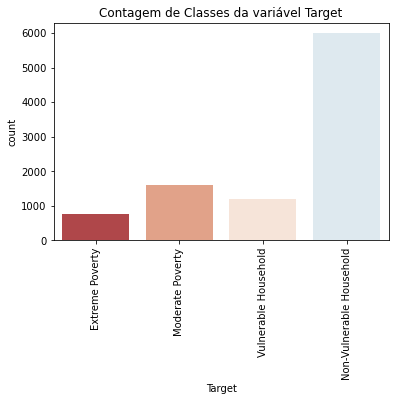

In [47]:
target= sns.countplot(x='Target',data=df_all)

target.set_title('Contagem de Classes da variável Target')
plt.xticks(np.arange(4), ['Extreme Poverty', 'Moderate Poverty', 'Vulnerable Household', 'Non-Vulnerable Household'], rotation=90)
plt.show()

### sobre as pessoas do dataset

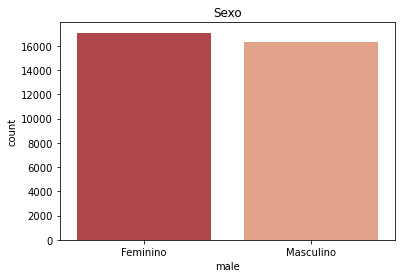

In [48]:
sex= sns.countplot(x='male',data=df_all)
sex.set_title('Sexo')
plt.xticks(np.arange(2), ['Feminino', 'Masculino'])
plt.show()

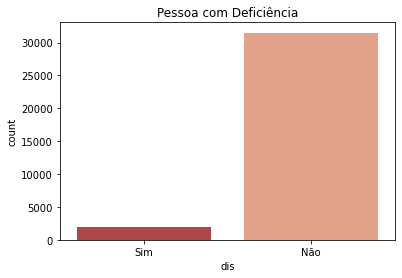

In [49]:
sex= sns.countplot(x='dis',data=df_all, order=[1,0])
sex.set_title('Pessoa com Deficiência')
plt.xticks(np.arange(2), [ 'Sim', 'Não'])
plt.show()

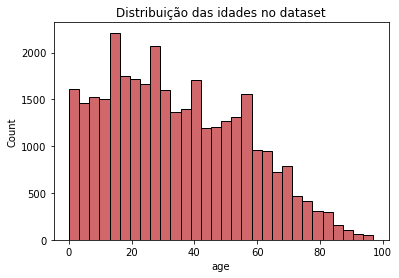

In [50]:
age=sns.histplot(df_all, x="age", bins=30 )
age.set_title('Distribuição das idades no dataset')
plt.show()

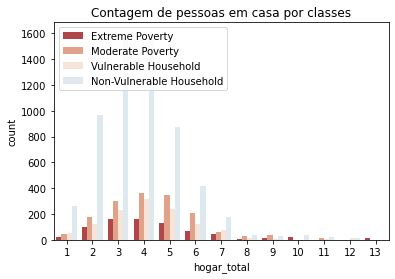

In [51]:
ph=sns.countplot(x='hogar_total', hue='Target',data=df_all)
ph.set_title('Contagem de pessoas em casa por classes')
labels= ['Extreme Poverty', 'Moderate Poverty', 'Vulnerable Household', 'Non-Vulnerable Household']

plt.legend(loc='upper left', labels=labels)
plt.show()


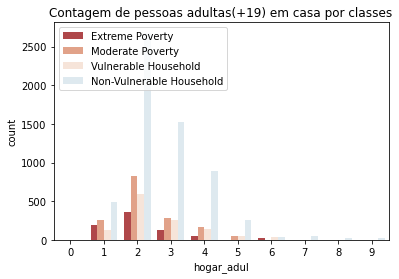

In [52]:
ph=sns.countplot(x='hogar_adul', hue='Target',data=df_all)
ph.set_title('Contagem de pessoas adultas(+19) em casa por classes')
labels= ['Extreme Poverty', 'Moderate Poverty', 'Vulnerable Household', 'Non-Vulnerable Household']

plt.legend(loc='upper left', labels=labels)
plt.show()


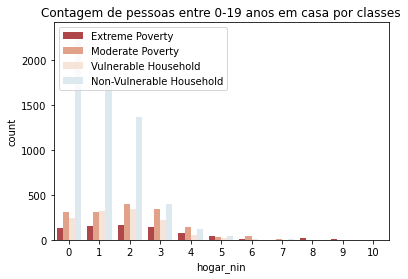

In [53]:
ph=sns.countplot(x='hogar_nin', hue='Target',data=df_all)
ph.set_title('Contagem de pessoas entre 0-19 anos em casa por classes')
labels= ['Extreme Poverty', 'Moderate Poverty', 'Vulnerable Household', 'Non-Vulnerable Household']

plt.legend(loc='upper left', labels=labels)
plt.show()


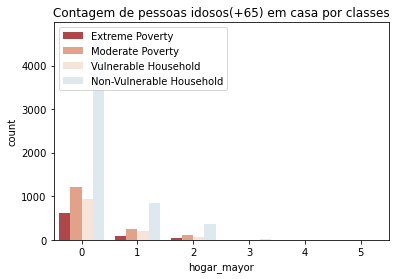

In [54]:
ph=sns.countplot(x='hogar_mayor', hue='Target',data=df_all)
ph.set_title('Contagem de pessoas idosos(+65) em casa por classes')
labels= ['Extreme Poverty', 'Moderate Poverty', 'Vulnerable Household', 'Non-Vulnerable Household']

plt.legend(loc='upper left', labels=labels)
plt.show()

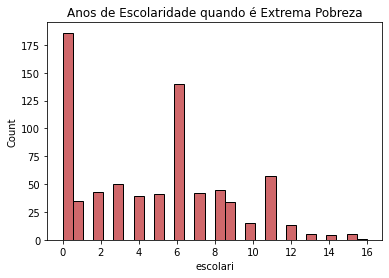

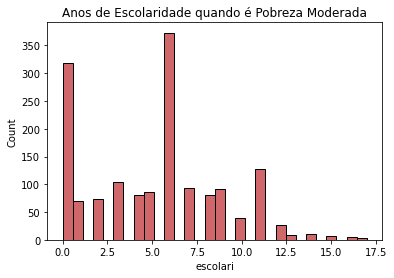

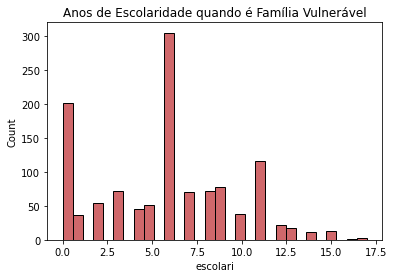

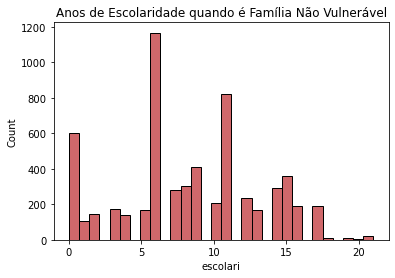

In [55]:

hep=sns.histplot(df_all[df_all['Target'] == 1], x="escolari", bins=30 )
hep.set_title('Anos de Escolaridade quando é Extrema Pobreza')
plt.show()

hp=sns.histplot(df_all[df_all['Target'] == 2], x="escolari", bins=30 )
hp.set_title('Anos de Escolaridade quando é Pobreza Moderada')
plt.show()

hcv=sns.histplot(df_all[df_all['Target'] == 3], x="escolari", bins=30 )
hcv.set_title('Anos de Escolaridade quando é Família Vulnerável')
plt.show()

hcnv=sns.histplot(df_all[df_all['Target'] == 4], x="escolari", bins=30 )
hcnv.set_title('Anos de Escolaridade quando é Família Não Vulnerável')
plt.show()

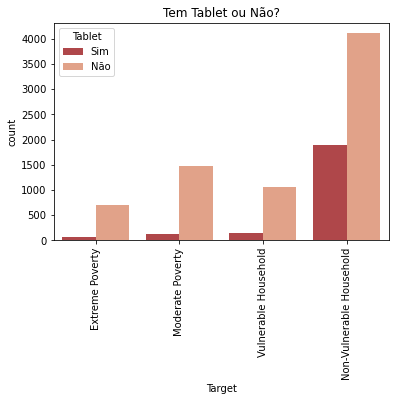

In [56]:
tablet=sns.countplot(x="Target",hue="v18q",hue_order=[1,0], data=df_all)
tablet.set_title('Tem Tablet ou Não?')
plt.xticks(np.arange(4), ['Extreme Poverty', 'Moderate Poverty', 'Vulnerable Household', 'Non-Vulnerable Household'], rotation=90)

#legenda
plt.legend(title='Tablet', loc='upper left', labels=['Sim', 'Não'])
plt.show()

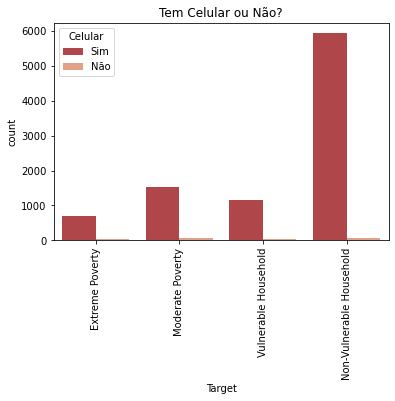

In [57]:
cel=sns.countplot(x="Target",hue="mobilephone",hue_order=[1,0], data=df_all)
cel.set_title('Tem Celular ou Não?')
plt.xticks(np.arange(4), ['Extreme Poverty', 'Moderate Poverty', 'Vulnerable Household', 'Non-Vulnerable Household'], rotation=90)

#legenda
plt.legend(title='Celular', loc='upper left', labels=['Sim', 'Não'])
plt.show()

### sobre localização das casas

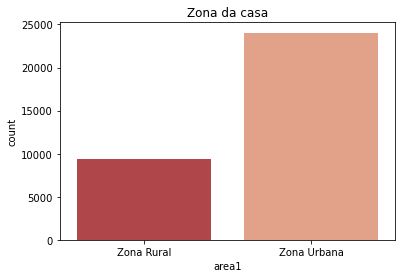

In [58]:
area= sns.countplot(x='area1',data=df_all)
area.set_title('Zona da casa')
plt.xticks(np.arange(2), [ 'Zona Rural', 'Zona Urbana'])
plt.show()

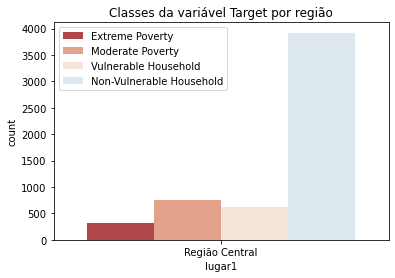

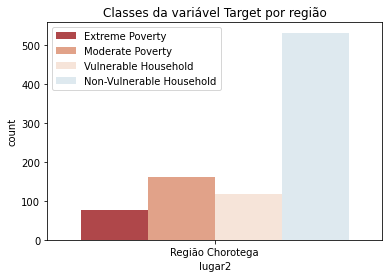

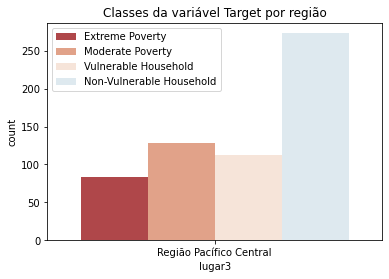

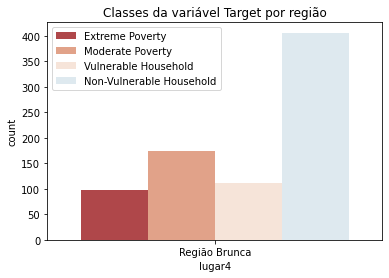

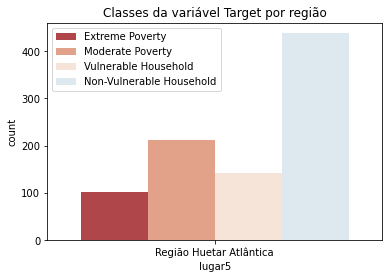

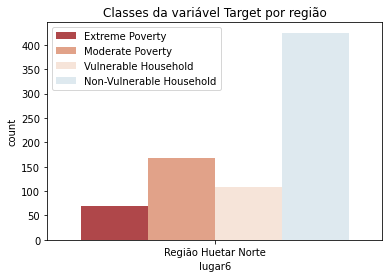

In [59]:
target= sns.countplot(x='lugar1', hue='Target',data=df_all[df_all['lugar1']==1])

target.set_title('Classes da variável Target por região')
plt.xticks(np.arange(1), ['Região Central'])
labels= ['Extreme Poverty', 'Moderate Poverty', 'Vulnerable Household', 'Non-Vulnerable Household']

plt.legend(loc='upper left', labels=labels)
plt.show()

#lugar2

target= sns.countplot(x='lugar2', hue='Target',data=df_all[df_all['lugar2']==1])

target.set_title('Classes da variável Target por região')
plt.xticks(np.arange(1), ['Região Chorotega'])
labels= ['Extreme Poverty', 'Moderate Poverty', 'Vulnerable Household', 'Non-Vulnerable Household']

plt.legend(loc='upper left', labels=labels)
plt.show()

# lugar3

target= sns.countplot(x='lugar3', hue='Target',data=df_all[df_all['lugar3']==1])

target.set_title('Classes da variável Target por região')
plt.xticks(np.arange(1), ['Região Pacífico Central'])
labels= ['Extreme Poverty', 'Moderate Poverty', 'Vulnerable Household', 'Non-Vulnerable Household']

plt.legend(loc='upper left', labels=labels)
plt.show()

#lugar4

target= sns.countplot(x='lugar4', hue='Target',data=df_all[df_all['lugar4']==1])

target.set_title('Classes da variável Target por região')
plt.xticks(np.arange(1), ['Região Brunca'])
labels= ['Extreme Poverty', 'Moderate Poverty', 'Vulnerable Household', 'Non-Vulnerable Household']

plt.legend(loc='upper left', labels=labels)
plt.show()

#lugar5

target= sns.countplot(x='lugar5', hue='Target',data=df_all[df_all['lugar5']==1])

target.set_title('Classes da variável Target por região')
plt.xticks(np.arange(1), ['Região Huetar Atlântica'])
labels= ['Extreme Poverty', 'Moderate Poverty', 'Vulnerable Household', 'Non-Vulnerable Household']

plt.legend(loc='upper left', labels=labels)
plt.show()

#lugar6

target= sns.countplot(x='lugar6', hue='Target',data=df_all[df_all['lugar6']==1])

target.set_title('Classes da variável Target por região')
plt.xticks(np.arange(1), ['Região Huetar Norte'])
labels= ['Extreme Poverty', 'Moderate Poverty', 'Vulnerable Household', 'Non-Vulnerable Household']

plt.legend(loc='upper left', labels=labels)
plt.show()

### sobre as casas

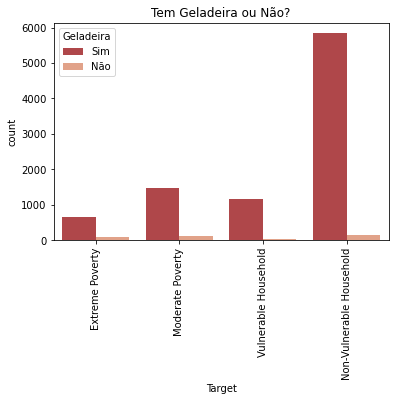

In [60]:
ref=sns.countplot(x="Target",hue="refrig",hue_order=[1,0], data=df_all)
ref.set_title('Tem Geladeira ou Não?')
plt.xticks(np.arange(4), ['Extreme Poverty', 'Moderate Poverty', 'Vulnerable Household', 'Non-Vulnerable Household'], rotation=90)

#legenda
plt.legend(title='Geladeira', loc='upper left', labels=['Sim', 'Não'])
plt.show()

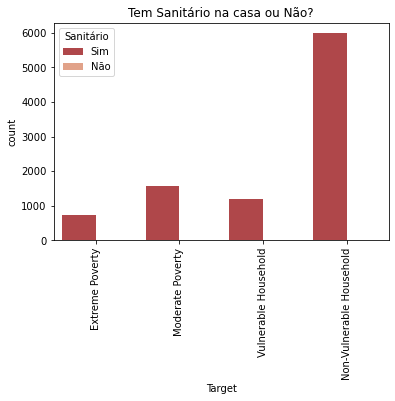

In [61]:
ref=sns.countplot(x="Target",hue="v14a",hue_order=[1,0], data=df_all)
ref.set_title('Tem Sanitário na casa ou Não?')
plt.xticks(np.arange(4), ['Extreme Poverty', 'Moderate Poverty', 'Vulnerable Household', 'Non-Vulnerable Household'], rotation=90)

#legenda
plt.legend(title='Sanitário', loc='upper left', labels=['Sim', 'Não'])
plt.show()

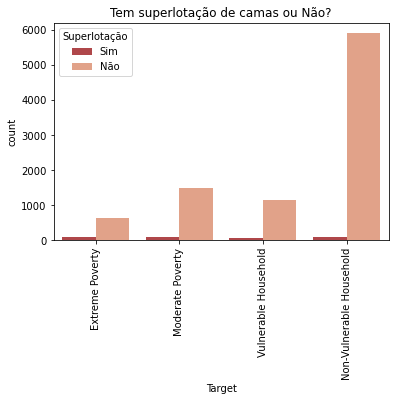

In [62]:
cama=sns.countplot(x="Target",hue="hacdor",hue_order=[1,0], data=df_all)
cama.set_title('Tem superlotação de camas ou Não?')
plt.xticks(np.arange(4), ['Extreme Poverty', 'Moderate Poverty', 'Vulnerable Household', 'Non-Vulnerable Household'], rotation=90)

#legenda
plt.legend(title='Superlotação', loc='upper left', labels=['Sim', 'Não'])
plt.show()

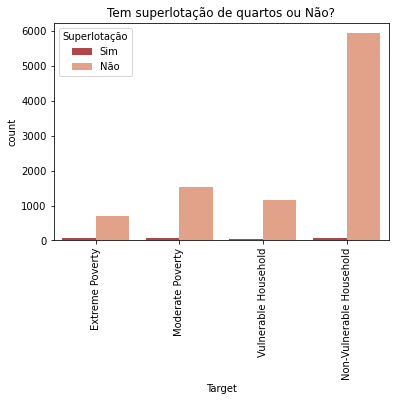

In [63]:
quartos=sns.countplot(x="Target",hue="hacapo",hue_order=[1,0], data=df_all)
quartos.set_title('Tem superlotação de quartos ou Não?')
plt.xticks(np.arange(4), ['Extreme Poverty', 'Moderate Poverty', 'Vulnerable Household', 'Non-Vulnerable Household'], rotation=90)

#legenda
plt.legend(title='Superlotação', loc='upper left', labels=['Sim', 'Não'])
plt.show()

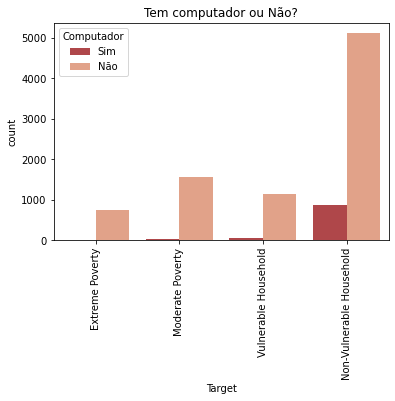

In [64]:
comp=sns.countplot(x="Target",hue="computer",hue_order=[1,0], data=df_all)
comp.set_title('Tem computador ou Não?')
plt.xticks(np.arange(4), ['Extreme Poverty', 'Moderate Poverty', 'Vulnerable Household', 'Non-Vulnerable Household'], rotation=90)

#legenda
plt.legend(title='Computador', loc='upper left', labels=['Sim', 'Não'])
plt.show()

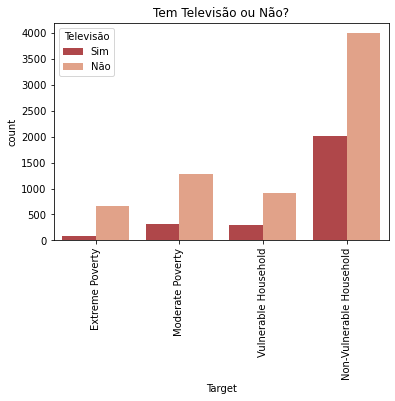

In [65]:
tv=sns.countplot(x="Target",hue="television",hue_order=[1,0], data=df_all)
tv.set_title('Tem Televisão ou Não?')
plt.xticks(np.arange(4), ['Extreme Poverty', 'Moderate Poverty', 'Vulnerable Household', 'Non-Vulnerable Household'], rotation=90)

#legenda
plt.legend(title='Televisão', loc='upper left', labels=['Sim', 'Não'])
plt.show()

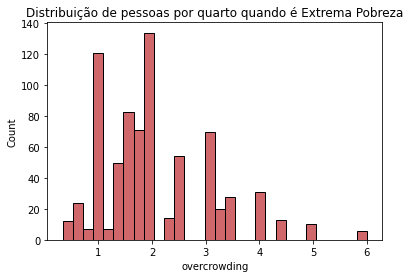

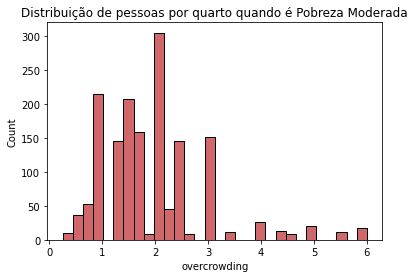

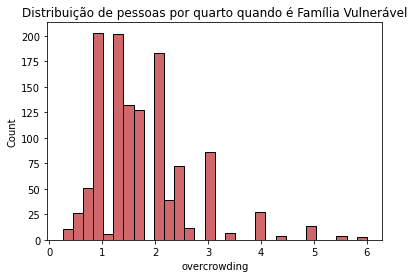

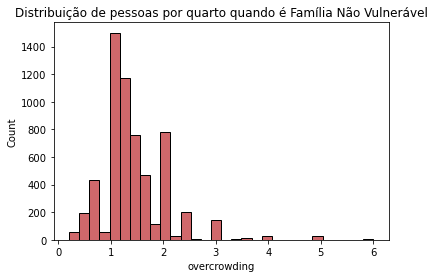

In [66]:

hep=sns.histplot(df_all[df_all['Target'] == 1], x="overcrowding", bins=30 )
hep.set_title('Distribuição de pessoas por quarto quando é Extrema Pobreza')
plt.show()

hp=sns.histplot(df_all[df_all['Target'] == 2], x="overcrowding", bins=30 )
hp.set_title('Distribuição de pessoas por quarto quando é Pobreza Moderada')
plt.show()

hcv=sns.histplot(df_all[df_all['Target'] == 3], x="overcrowding", bins=30 )
hcv.set_title('Distribuição de pessoas por quarto quando é Família Vulnerável')
plt.show()

hcnv=sns.histplot(df_all[df_all['Target'] == 4], x="overcrowding", bins=30 )
hcnv.set_title('Distribuição de pessoas por quarto quando é Família Não Vulnerável')
plt.show()

### Preços de Alugueis

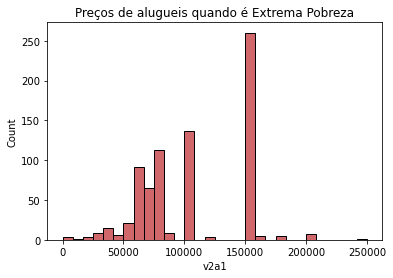

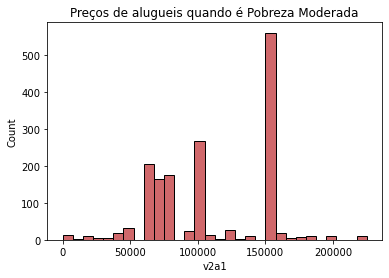

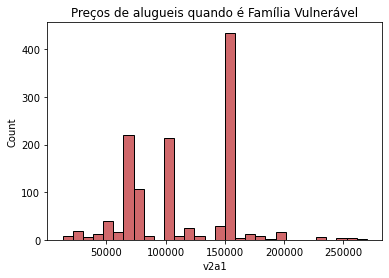

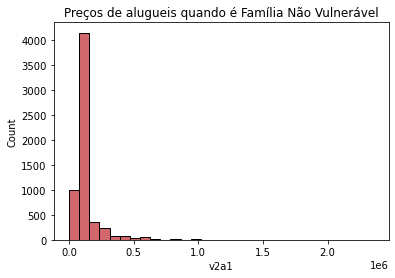

In [67]:
hep=sns.histplot(df_all[df_all['Target'] == 1], x="v2a1", bins=30 )
hep.set_title('Preços de alugueis quando é Extrema Pobreza')
plt.show()

hp=sns.histplot(df_all[df_all['Target'] == 2], x="v2a1", bins=30 )
hp.set_title('Preços de alugueis quando é Pobreza Moderada')
plt.show()

hcv=sns.histplot(df_all[df_all['Target'] == 3], x="v2a1", bins=30 )
hcv.set_title('Preços de alugueis quando é Família Vulnerável')
plt.show()

hcnv=sns.histplot(df_all[df_all['Target'] == 4], x="v2a1", bins=30 )
hcnv.set_title('Preços de alugueis quando é Família Não Vulnerável')
plt.show()

## Separando entre treino e teste

In [68]:
train, test = df_all[~df_all['Target'].isnull()], df_all[df_all['Target'].isnull()]

train.shape, test.shape

((9557, 143), (23856, 143))

## Tratamento de classes desbalanceadas

In [69]:
# Importando a biblioteca
import imblearn

In [70]:
train['Target'].value_counts()

4.0    5996
2.0    1597
3.0    1209
1.0     755
Name: Target, dtype: int64

In [71]:
train['Target'].value_counts(normalize=True)

4.0    0.627394
2.0    0.167103
3.0    0.126504
1.0    0.079000
Name: Target, dtype: float64

In [72]:
feats = [c for c in train.columns if c not in ['Id', 'idhogar', 'Target']]

In [73]:
# Separando os dados de entrada e o target da base de treino
X, y = train[feats], train[['Target']]

In [74]:
from imblearn.over_sampling import SMOTE

# Fazendo o SMOTE
sm = SMOTE()
X_sm, y_sm = sm.fit_resample(X,y)

# Verificando os dados
y_sm['Target'].value_counts()

4.0    5996
2.0    5996
3.0    5996
1.0    5996
Name: Target, dtype: int64

In [75]:
# Juntando os dados
train = pd.concat([X_sm, y_sm], axis=1)
train.shape, train['Target'].value_counts(normalize=True)

((23984, 141),
 4.0    0.25
 2.0    0.25
 3.0    0.25
 1.0    0.25
 Name: Target, dtype: float64)

## Random Forest

In [76]:
from sklearn.ensemble import RandomForestClassifier

# Importando a métrica
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42, oob_score=True,
                           min_samples_leaf=5, min_samples_split=20, max_depth=10)

In [77]:
# Separando as colunas para treinamento
feats2 = [c for c in df_all.columns if c not in ['Id', 'idhogar', 'Target']]

In [78]:
# Treinando o modelo
rf.fit(train[feats], train['Target'])

RandomForestClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=20,
                       n_estimators=200, n_jobs=-1, oob_score=True,
                       random_state=42)

In [79]:
# Prever o Target do Dataframe de teste
test['Target'] = rf.predict(test[feats2]).astype(int)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [80]:
# Verificando as previsões
test['Target'].value_counts(normalize=True)

4    0.661511
2    0.147175
3    0.121647
1    0.069668
Name: Target, dtype: float64

In [81]:
# Criando o arquivo para submissão
test[['Id', 'Target']].to_csv('submission.csv', index=False) 

## GBM

In [82]:
# Trabalhando com GBM
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier(n_estimators=200, learning_rate=1.0, max_depth=4, random_state=42, min_samples_split=2, min_samples_leaf=1, subsample=1)
gbm.fit(train[feats], train['Target'])

GradientBoostingClassifier(learning_rate=1.0, max_depth=4, n_estimators=200,
                           random_state=42, subsample=1)

In [83]:

# Prever o Target do Dataframe de teste
test['Target'] = gbm.predict(test[feats2]).astype(int)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [84]:
# Verificando as previsões
test['Target'].value_counts(normalize=True)

4    0.679787
2    0.157948
3    0.102951
1    0.059314
Name: Target, dtype: float64

## XGboost

In [85]:
# Trabalhando com XGBoost
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=200, learning_rate=0.09, random_state=42)
xgb.fit(train[feats], train['Target'])

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:24:50] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.09, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [86]:
# Prever o Target do Dataframe de teste
test['Target'] = xgb.predict(test[feats2]).astype(int)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [87]:
# Verificando as previsões
test['Target'].value_counts(normalize=True)

4    0.739562
2    0.144492
3    0.064219
1    0.051727
Name: Target, dtype: float64

## Adaboost

In [88]:
# Trabalhando com AdaBoost
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(n_estimators=200, learning_rate=1.0, random_state=42)
abc.fit(train[feats], train['Target'])

AdaBoostClassifier(n_estimators=200, random_state=42)

In [89]:
# Prever o Target do Dataframe de teste
test['Target'] = abc.predict(test[feats2]).astype(int)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [90]:
# Verificando as previsões
test['Target'].value_counts(normalize=True)

4    0.682721
2    0.157948
3    0.088573
1    0.070758
Name: Target, dtype: float64

### O modelo random Forest teve maior score, foi o melhor modelo!!!